## read data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
stu_data = pd.read_csv('../data/students_adaptability_level_online_education.csv')
stu_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [2]:
stu_data.shape
      

(1205, 14)

In [3]:
stu_data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [4]:
stu_data[stu_data['Adaptivity Level']=='High']

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
20,Girl,6-10,School,Non Government,No,Yes,Low,Rich,Wifi,4G,1-3,No,Mobile,High
37,Girl,6-10,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,High
65,Boy,26-30,University,Government,No,No,Low,Mid,Mobile Data,4G,1-3,No,Mobile,High
86,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,High
109,Girl,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,3G,1-3,Yes,Mobile,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Boy,26-30,University,Government,Yes,Yes,Low,Rich,Wifi,4G,1-3,No,Mobile,High
1176,Boy,26-30,University,Government,Yes,Yes,Low,Rich,Wifi,4G,1-3,No,Computer,High
1179,Girl,11-15,School,Non Government,No,Yes,Low,Rich,Wifi,3G,1-3,No,Mobile,High
1193,Boy,21-25,University,Non Government,Yes,Yes,High,Poor,Wifi,4G,1-3,Yes,Computer,High


In [5]:
for feature in stu_data.columns:
    print('{}:     {}  unique value'.format(feature,stu_data[feature].unique()))

Gender:     ['Boy' 'Girl']  unique value
Age:     ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']  unique value
Education Level:     ['University' 'College' 'School']  unique value
Institution Type:     ['Non Government' 'Government']  unique value
IT Student:     ['No' 'Yes']  unique value
Location:     ['Yes' 'No']  unique value
Load-shedding:     ['Low' 'High']  unique value
Financial Condition:     ['Mid' 'Poor' 'Rich']  unique value
Internet Type:     ['Wifi' 'Mobile Data']  unique value
Network Type:     ['4G' '3G' '2G']  unique value
Class Duration:     ['3-6' '1-3' '0']  unique value
Self Lms:     ['No' 'Yes']  unique value
Device:     ['Tab' 'Mobile' 'Computer']  unique value
Adaptivity Level:     ['Moderate' 'Low' 'High']  unique value


In [6]:
le = LabelEncoder()
for feature in stu_data.columns:
    stu_data[feature]=le.fit_transform(stu_data[feature].astype(str)) 

In [7]:
stu_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [8]:
stu_data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [9]:
features =stu_data.drop('Adaptivity Level',axis=1) 
label = stu_data['Adaptivity Level']

In [10]:
features

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,0,3,2,1,0,1,1,0,1,2,2,0,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1
2,1,2,0,0,0,1,1,0,1,2,1,0,1
3,1,1,1,1,0,1,1,0,0,2,1,0,1
4,1,2,1,1,0,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1
1202,0,1,1,1,0,1,1,0,0,1,1,0,1
1203,1,2,0,1,0,0,1,0,1,2,1,0,1


In [11]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size =.4,random_state=42)
x_val,x_test,y_val,y_test =train_test_split(x_test,y_test,test_size=.5,random_state=42) 

In [12]:
for i in [x_train,x_val,y_test]:
    print(len(i))

723
241
241


In [13]:
#writ out all data
x_train.to_csv('../data/train_featues.csv',index=False)
x_val.to_csv('../data/val_featues.csv',index=False)
x_test.to_csv('../data/test_featues.csv',index=False)

y_train.to_csv('../data/train_label.csv',index=False)
y_val.to_csv('../data/val_label.csv',index=False)
y_test.to_csv('../data/test_label.csv',index=False)

## read all data as a datafram 

In [14]:
stu_train = pd.read_csv('../data/train_featues.csv')
stu_val = pd.read_csv('../data/val_featues.csv')
stu_test = pd.read_csv('../data/test_featues.csv')
stu_train.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,0,2,1,0,0,1,1,2,0,2,1,0,1
1,1,1,1,1,0,1,1,0,0,2,1,0,1
2,1,0,1,1,0,1,1,1,0,2,1,0,1
3,1,2,1,1,0,1,1,0,1,2,1,0,0
4,1,1,1,1,0,1,1,2,1,1,1,0,1


## standard all data in traning (feature)

In [15]:
scaller = StandardScaler()
scaller.fit(stu_train)

StandardScaler()

In [16]:
features = stu_train.columns
stu_train[features] = scaller.transform(stu_train[features])
stu_val[features] = scaller.transform(stu_val[features])
stu_test[features] = scaller.transform(stu_test[features])

In [17]:
stu_val.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,-0.896098,0.760241,1.124007,0.693943,-0.582142,-1.810554,0.428143,-0.564524,1.180695,0.706516,-1.987775,-0.450550,0.269314
1,-0.896098,-0.944113,-0.225922,0.693943,-0.582142,0.552317,0.428143,-0.564524,-0.846959,0.706516,-0.104208,-0.450550,0.269314
2,1.115949,-0.091936,-1.575851,-1.441040,-0.582142,0.552317,0.428143,-0.564524,1.180695,0.706516,-0.104208,-0.450550,0.269314
3,-0.896098,0.760241,1.124007,0.693943,1.717795,0.552317,0.428143,-0.564524,1.180695,-1.304551,-0.104208,2.219511,-2.361953
4,-0.896098,0.760241,1.124007,0.693943,1.717795,0.552317,0.428143,-0.564524,1.180695,0.706516,-0.104208,-0.450550,-2.361953


In [18]:
stu_train['Age'].describe()

count    7.230000e+02
mean    -7.155794e-17
std      1.000692e+00
min     -1.796291e+00
25%     -9.441134e-01
50%     -9.193614e-02
75%      7.602412e-01
max      2.464596e+00
Name: Age, dtype: float64

## build our model 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
stu_train = pd.read_csv('../data/train_featues.csv')
stu_val = pd.read_csv('../data/val_featues.csv')
stu_test = pd.read_csv('../data/test_featues.csv')
labels = pd.read_csv('../data/train_label.csv')
stu_train.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,0,2,1,0,0,1,1,2,0,2,1,0,1
1,1,1,1,1,0,1,1,0,0,2,1,0,1
2,1,0,1,1,0,1,1,1,0,2,1,0,1
3,1,2,1,1,0,1,1,0,1,2,1,0,0
4,1,1,1,1,0,1,1,2,1,1,1,0,1


<AxesSubplot:>

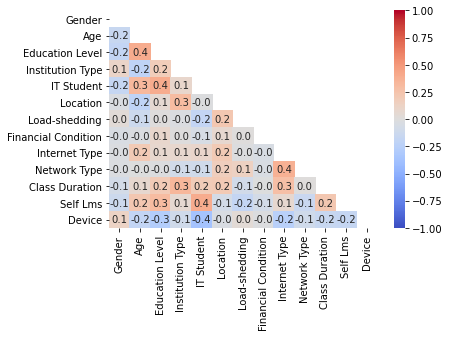

In [21]:
#if correlation between feature using heatmap function 
matrix = np.triu(stu_train.corr())
sns.heatmap(stu_train.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

In [22]:
#define a function to show the result of gridesearchCV paramters
def cv_result(result):
    print('BEST PARAMS: {}\n'.format(result.best_params_))
    means = result.cv_results_['mean_test_score']
    stds = result.cv_results_['std_test_score']
    for mean , std ,param in zip(means,stds,result.cv_results_['params']):
        print('mean:{} & std +/-{} for {}'.format(round(mean,2),round(std*2,2),param))

In [32]:
cv.best_params_

{'max_depth': 16, 'n_estimators': 512}

In [23]:
#initial the radomeforest and parameters and find the best params usig gridsearchCV
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(stu_train,labels.values.ravel())
cv_result(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 512}

mean:0.64 & std +/-0.08 for {'max_depth': 2, 'n_estimators': 8}
mean:0.65 & std +/-0.04 for {'max_depth': 2, 'n_estimators': 16}
mean:0.65 & std +/-0.07 for {'max_depth': 2, 'n_estimators': 32}
mean:0.65 & std +/-0.06 for {'max_depth': 2, 'n_estimators': 64}
mean:0.64 & std +/-0.05 for {'max_depth': 2, 'n_estimators': 128}
mean:0.65 & std +/-0.07 for {'max_depth': 2, 'n_estimators': 256}
mean:0.65 & std +/-0.06 for {'max_depth': 2, 'n_estimators': 512}
mean:0.68 & std +/-0.08 for {'max_depth': 4, 'n_estimators': 8}
mean:0.68 & std +/-0.08 for {'max_depth': 4, 'n_estimators': 16}
mean:0.69 & std +/-0.08 for {'max_depth': 4, 'n_estimators': 32}
mean:0.68 & std +/-0.08 for {'max_depth': 4, 'n_estimators': 64}
mean:0.69 & std +/-0.08 for {'max_depth': 4, 'n_estimators': 128}
mean:0.68 & std +/-0.08 for {'max_depth': 4, 'n_estimators': 256}
mean:0.68 & std +/-0.06 for {'max_depth': 4, 'n_estimators': 512}
mean:0.81 & std +/-0.06 for {'max

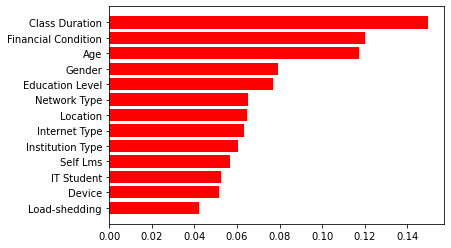

In [24]:
# find important features
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [stu_train.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [25]:
# Write out the model fit on the whole training set
import joblib

joblib.dump(cv.best_estimator_, '../data/mdl.pkl')

['../data/mdl.pkl']

## validate and  test the model

In [26]:
train_feature  = pd.read_csv('../data/train_featues.csv')
val_feature  = pd.read_csv('../data/val_featues.csv')
test_feature  = pd.read_csv('../data/test_featues.csv')

train_label = pd.read_csv('../data/train_label.csv')
val_label = pd.read_csv('../data/val_label.csv')
test_label = pd.read_csv('../data/test_label.csv')

In [27]:
model = joblib.load('../data/mdl.pkl')

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [29]:
#validate the model
pred = model.predict(val_feature)
accuracy  = accuracy_score(val_label, pred)
precision =precision_score(val_label, pred,average='micro')
recall    = recall_score(val_label, pred,average='micro')

print('accuracy: {} / precesion:{} / recall:{}'.format(round(accuracy,2), round(precision,2), round(recall,2)))

accuracy: 0.9 / precesion:0.9 / recall:0.9


In [30]:
#test the model
pred = model.predict(test_feature)
accuracy  = accuracy_score(test_label, pred)
precision =precision_score(test_label, pred,average='micro')
recall    = recall_score(test_label, pred,average='micro')

print('accuracy: {} / precesion:{} / recall:{}'.format(round(accuracy,2), round(precision,2), round(recall,2)))

accuracy: 0.87 / precesion:0.87 / recall:0.87


#### finally you should note because no more variability in our data set we don't need for 
#### standard all data or make transformation for features


In [31]:
#to ensure look at std and mean for each feature
stu_data.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.449793,2.122822,1.196680,0.682988,0.252282,0.775934,0.833195,0.341909,0.423237,1.627386,1.047303,0.174274,0.890456,1.435685
std,0.497679,1.210359,0.722437,0.465506,0.434503,0.417139,0.372956,0.605302,0.494277,0.515295,0.548559,0.379502,0.384003,0.642013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
